# W4 Lab Assignment

This lab is more about experimenting instead of coding. We will cover Stevens’ power-law and matplotlib's colormaps.

First, import libraries and use the `matplotlib inline` magic command:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

# Stevens’ power-law and your own psychophysics experiment!

Let's do the experiment. The procedure is as follows:

1. Generate a random number between \[0.01,0.1\];
1. Use a horizontal bar to represent the number, i.e., the length of the bar is equal to the number;
1. Guess the length of the bar by comparing it to two other bars with length 0.01 and 0.1 respectively;
1. Store your guess (perceived length) and actual length to two lists;
1. Repeat the above steps several times;
1. Check whether Steven's power-law holds.

First, we use two lists to store perceived and actual length.

In [2]:
import random
import time

n1 = 0.01
length_perceived = []
length_actual = []

Then, we can run the experiment.

The [**`random`**](https://docs.python.org/2/library/random.html) module in Python provides various random number generators, and the [**`random.uniform(a,b)`**](https://docs.python.org/2/library/random.html#random.uniform) function returns a float in \[a,b\]. Thus, `n2 = n1 * random.uniform(1,10)` means `n2` will be a random number in the interval \[0.01\*1,0.01\*10\], which is \[0.01,0.1\].

We can plot horizontal bars using the [**`pyplot.barh()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) function. The lengths of them are 0.01, `n2`, 0.1.

([<matplotlib.axis.YTick at 0x10648a7d0>,
 <a list of 3 Text yticklabel objects>)

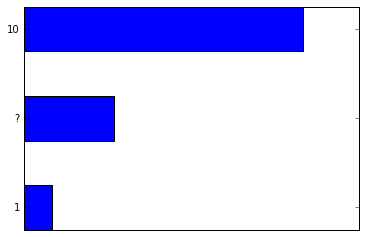

In [7]:
n2 = n1 * random.uniform(1,10)

plt.barh(np.arange(3), [n1, n2, 0.1], height=0.5)
plt.gca().set_frame_on(True)
plt.gca().get_xaxis().set_visible(False)
plt.yticks(np.arange(3)+0.25, ('1', '?', '10'))

From the plot above, guess the ratio between the length of the middle and the bottom bar. We can think of this more directly: If the length of the bottom bar is 1 and the top one is 10, what is the length of the middle one?

Put your guess (perceived length) in `length_perceived.append()`. And the `length_actual.append(n2/n1)` will store the actual ratio.

In [8]:
length_perceived.append(3) # put the ratio that you perceived and run this cell (shift + enter). 

length_actual.append(n2/n1)
print('{:.2f}'.format(n2/n1))

3.24


Run the procedure several times (run the above two code cells several times).

Now we can draw the scatter plot of perceived and actual length. The [**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function will do this.

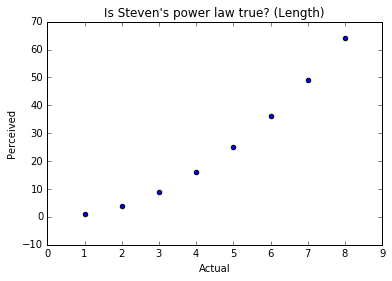

In [10]:
length_actual = [1,2,3,4,5,6,7,8]
length_perceived = [1,4,9,16,25,36,49,64]
# Comment out the above two lines and use your experiment results.
plt.scatter(length_actual, length_perceived)
plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")

After plotting, let's fit the relation between actual and perceived lengths using a polynomial function. We can easily do it using [**`curve_fit(f, x, y)`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) in Scipy, which is to fit $x$ and $y$ using the function `f`. In our case, $f = a*x^b +c$.

In [11]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

popt, pcov = curve_fit(func, length_actual, length_perceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

1.00 x^2.00 + 0.00


Similar to the above experiment, we now represent a random number as a circle, and the area of the circle is equal to the number.

First, calculate the radius of a circle from its area and then plot using the **`Circle()`** function. `plt.Circle((0,0), r)` will plot a circle centered at (0,0) with radius `r`.

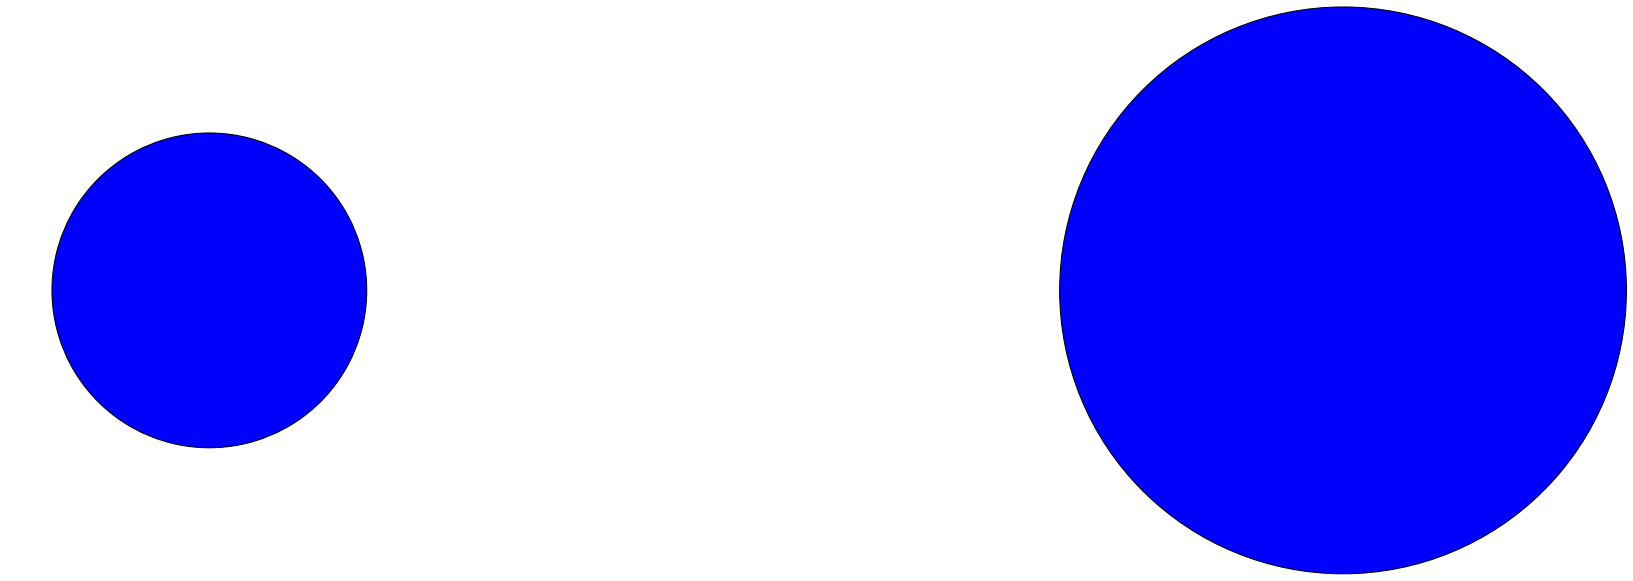

In [12]:
import math

radius1 = math.sqrt(n1/math.pi) # area = pi * r * r
radius2 = math.sqrt(n2/math.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
plt.gca().add_artist(circ1)
plt.gca().add_artist(circ2)

Write the code to run the experiment, plot and fit your results in the cell below.

In [13]:
# implement here


# Colormaps

Let's plot a sine and cosine wave respectively with red and green color.

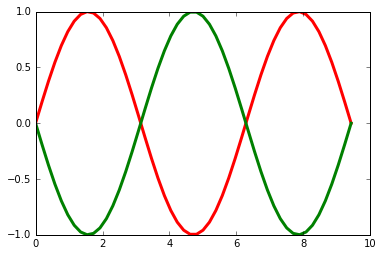

In [14]:
x = np.linspace(0, 3*np.pi)
plt.plot(x, np.sin(x), color='r', lw=3)
plt.plot(x, np.sin(x-np.pi), color='g', lw=3)

We can also use different color schemes in matplotlib. Here you can find them

http://matplotlib.org/users/colormaps.html

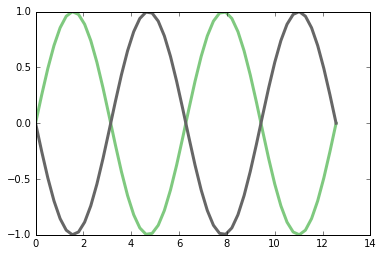

In [22]:
plt.plot(x, np.sin(x), color=plt.cm.Accent(0), lw=3)
plt.plot(x, np.sin(x-np.pi), color=plt.cm.Accent(1.0), lw=3)

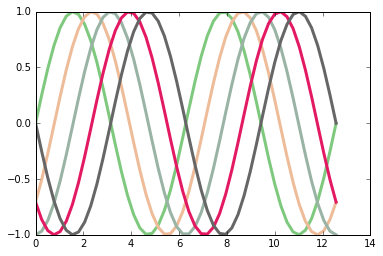

In [23]:
num_lines = 5
x = np.linspace(0, 4*np.pi)
shift = np.linspace(0, np.pi, num_lines)
color_idx = np.linspace(0, 1, num_lines)
for i in range(len(color_idx)):
    plt.plot(x, np.sin(x - shift[i]), color=plt.cm.Accent(color_idx[i]), lw=3)

Try different color schemes by changing the `color=plt.cm.Accent(color_idx[i]), lw=3)` with different scheme names.

In [28]:
# implement here


# Colormap and images

http://matplotlib.org/users/image_tutorial.html

We can also display an image using Colormaps. First read it using the [`imread()`](http://matplotlib.org/api/image_api.html#matplotlib.image.imread) function that returns an `numpy.array()`.

In [33]:
import colormaps as cmaps
import matplotlib.image as mpimg

In [37]:
img = mpimg.imread('sneakySnake.png')
lum_img = np.flipud(img[:,:,0])

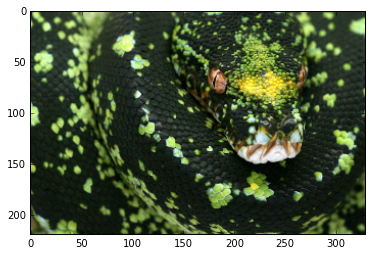

In [38]:
plt.imshow(img)

In [39]:
img[0]

array([[ 0.15294118,  0.21568628,  0.14117648,  1.        ],
       [ 0.16470589,  0.22745098,  0.15686275,  1.        ],
       [ 0.17254902,  0.24705882,  0.14509805,  1.        ],
       ..., 
       [ 0.1882353 ,  0.22352941,  0.17647059,  1.        ],
       [ 0.1882353 ,  0.23921569,  0.18039216,  1.        ],
       [ 0.21960784,  0.29803923,  0.21176471,  1.        ]], dtype=float32)

In [40]:
img[0][0]

array([ 0.15294118,  0.21568628,  0.14117648,  1.        ], dtype=float32)

We can also flip the image in the up/down direction, using the [`numpy.flipud()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.flipud.html) function.

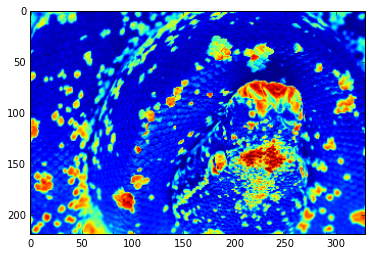

In [41]:
plt.imshow(np.flipud(img[:,:,0]))

Display the image using other Colormaps.

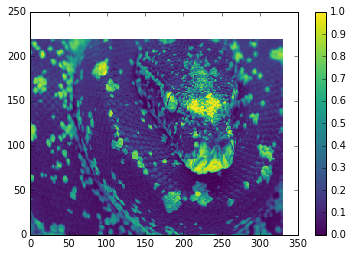

In [42]:
plt.pcolormesh(lum_img, cmap=cmaps.viridis)
plt.colorbar()

# Seaborn color palettes

These are essentially based on matplotlib, but Seaborn makes pre-defined, good lookingpalettes that you can use.

See: https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.color_palette.html#seaborn.color_palette
    https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html


In [2]:
import seaborn as sns

From https://stanford.edu/~mwaskom/software/seaborn/examples/timeseries_of_barplots.html

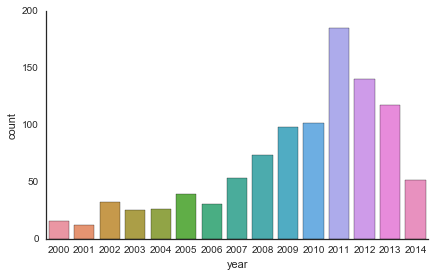

In [19]:
sns.set(style="white")

# Load the example planets dataset
planets = sns.load_dataset("planets")
years = np.arange(2000, 2015)

#Make a barplot with default color
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years)

To specify a palette:

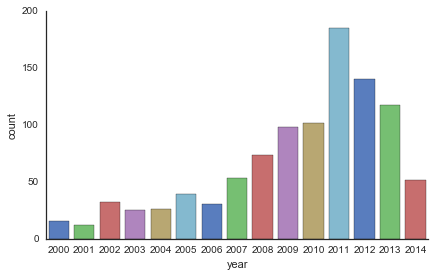

In [24]:
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years, palette="muted")

We can also create a palette, and pass it as an argument:

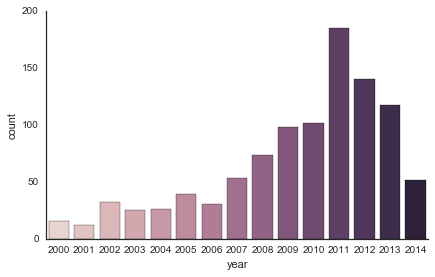

In [27]:
p = sns.cubehelix_palette(15)
g = sns.factorplot(x="year", data=planets, kind="count", size=4, aspect=1.5, order=years, palette=p)

Try to create a few palettes with consideration for the rules we talked about in class.

In [29]:
#implement here